calc_pi_numba => Pi: 3.28 Attempts: 50 Time: 0:00:00.000008
calc_pi_numba => Pi: 3.14172248 Attempts: 50000000 Time: 0:00:01.522561
calc_pi_numba => Pi: 3.14175736 Attempts: 500000000 Time: 0:00:15.899806


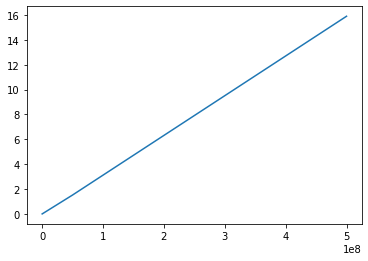

In [3]:
import calcpi
from timeit import default_timer as timer
from datetime import timedelta
import matplotlib.pyplot as plt
import plotly.graph_objects as go

if __name__ == '__main__':
    
    num_attempts = [50, 50_000_000, 500_000_000]
    function_list = [calcpi.calc_pi_numba]
    results_dict = {}

    for func in function_list:

        timings = []
        
        for x in num_attempts:
        
            start = timer()
            pi = func(x)
            end = timer()  
            timings.append((end-start))
            print("{} => Pi: {} Attempts: {} Time: {}".format(func.__name__, pi, x, timedelta(seconds=end-start)))

        results_dict[func.__name__] = timings
    
    go_data = []
    # lets pretty this up so the axis label is more readable
    x_axis = ['{:,}'.format(x) for x in num_attempts]
    
    for func in function_list:
    
        plt.plot(num_attempts, results_dict[func.__name__])
        
        go_data.append(go.Bar(name=func.__name__, x=x_axis, y=results_dict[func.__name__]))

    plt.show()

    fig = go.Figure(data=go_data)
    # Change the bar mode
    fig.update_layout(xaxis_type='category',barmode='group')
    fig.show()
        
        
    
    

    

In [2]:
import plotly.graph_objects as go

import numpy as np

# lets pretty this up so the axis label is more readable
x_axis = ['{:,}'.format(x) for x in num_attempts]

fig = go.Figure(data=[
    go.Bar(name='Multi-Numba Process', x=x_axis, y=multi_numba_timings),
    go.Bar(name='Multi Process', x=x_axis, y=multi_timings),
    go.Bar(name='Single Process', x=x_axis, y=single_timings)])
# Change the bar mode
fig.update_layout(xaxis_type='category',barmode='group')
fig.show()

NameError: name 'multi_numba_timings' is not defined

In [ ]:
import calcpi
from timeit import default_timer as timer
from datetime import timedelta
import matplotlib.pyplot as plt

x = 50_000_000

start = timer()
base_pi = calcpi.calc_pi_quick(x)
end = timer()  
print("Base Pi: {}: {} took {}".format(base_pi, x, timedelta(seconds=end-start)))

# Numba function
start = timer()
numba_pi = calcpi.calc_pi_numba(x)
end = timer()  
print("Numba Pi: {}: {} took {}".format(numba_pi, x, timedelta(seconds=end-start)))

# 
start = timer()
numba_py_pi = calcpi.multi_calc_pi(x)
end = timer()  
print("Multi Pi: {}: {} took {}".format(numba_py_pi, x, timedelta(seconds=end-start)))
